# Assignment 2 - Data Preprocessing
### Ahsan Shakoor


- Deadline: Thursday, 20.11.2024
- Data Source: https://www.kaggle.com/datasets/jacopoferretti/wages-and-education-of-young-males-dataset/data


In this assignment, you will preprocess and clean a dataset by handling missing values, correcting inconsistencies, normalizing or encoding features, and removing outliers to prepare it for analysis or modeling. The expected result is a clean, structured dataset ready for further analysis or machine learning._

In [316]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


In [317]:
df = pd.read_csv(r'Males.csv')

In [318]:
df.sample(5)

,rownames,nr,year,school,exper,union,ethn,maried,health,wage,industry,occupation,residence
449,450,945,1981,14,2,no,other,no,no,1.359861,Finance,Clerical_and_kindred,nothern_central
1912,1913,3848,1980,12,2,no,other,no,no,1.998046,Trade,Clerical_and_kindred,nothern_central
3895,3896,9936,1987,12,10,yes,hisp,yes,no,2.786848,Manufacturing,"Craftsmen, Foremen_and_kindred",NaN
64,65,162,1980,11,2,yes,other,no,no,0.502470,Trade,Clerical_and_kindred,north_east
613,614,1204,1985,8,10,yes,other,no,no,2.011084,Manufacturing,Operatives_and_kindred,south


In [319]:
df.shape

(4360, 13)

In [320]:
df.duplicated().sum()

0

In [321]:
df.isnull().sum()

rownames         0
nr               0
year             0
school           0
exper            0
union            0
ethn             0
maried           0
health           0
wage             0
industry         0
occupation       0
residence     1245
dtype: int64

In [322]:
# df = df.drop(['rownames', 'nr'], axis=1)
df = df.drop(['rownames'], axis=1)

In [323]:
df.describe()

,nr,year,school,exper,wage
count,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000
mean,5262.058716,1983.500000,11.766972,6.514679,1.649147
std,3496.149815,2.291551,1.746181,2.825873,0.532609
min,13.000000,1980.000000,3.000000,0.000000,-3.579079
25%,2329.000000,1981.750000,11.000000,4.000000,1.350717
50%,4569.000000,1983.500000,12.000000,6.000000,1.671143
75%,8406.000000,1985.250000,12.000000,9.000000,1.991086
max,12548.000000,1987.000000,16.000000,18.000000,4.051860


In [324]:
df['residence'] = df['residence'].fillna(df['residence'].mode()[0])


In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4360 entries, 0 to 4359
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nr          4360 non-null   int64  
 1   year        4360 non-null   int64  
 2   school      4360 non-null   int64  
 3   exper       4360 non-null   int64  
 4   union       4360 non-null   object 
 5   ethn        4360 non-null   object 
 6   maried      4360 non-null   object 
 7   health      4360 non-null   object 
 8   wage        4360 non-null   float64
 9   industry    4360 non-null   object 
 10  occupation  4360 non-null   object 
 11  residence   4360 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 408.9+ KB


In [326]:
df.nunique()

nr             545
year             8
school          13
exper           19
union            2
ethn             3
maried           2
health           2
wage          3631
industry        12
occupation       9
residence        4
dtype: int64

In [327]:
df[['union', 'ethn', 'maried', 'health', 'industry', 'occupation', 'residence']].nunique()

union          2
ethn           3
maried         2
health         2
industry      12
occupation     9
residence      4
dtype: int64

In [328]:
print(df['union'].value_counts())
df['ethn'].value_counts()

union
no     3296
yes    1064
Name: count, dtype: int64


ethn
other    3176
hisp      680
black     504
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Business_and_Repair_Service'),
  Text(1, 0, 'Personal_Service'),
  Text(2, 0, 'Trade'),
  Text(3, 0, 'Construction'),
  Text(4, 0, 'Manufacturing'),
  Text(5, 0, 'Transportation'),
  Text(6, 0, 'Professional_and_Related Service'),
  Text(7, 0, 'Finance'),
  Text(8, 0, 'Entertainment'),
  Text(9, 0, 'Public_Administration'),
  Text(10, 0, 'Agricultural'),
  Text(11, 0, 'Mining')])

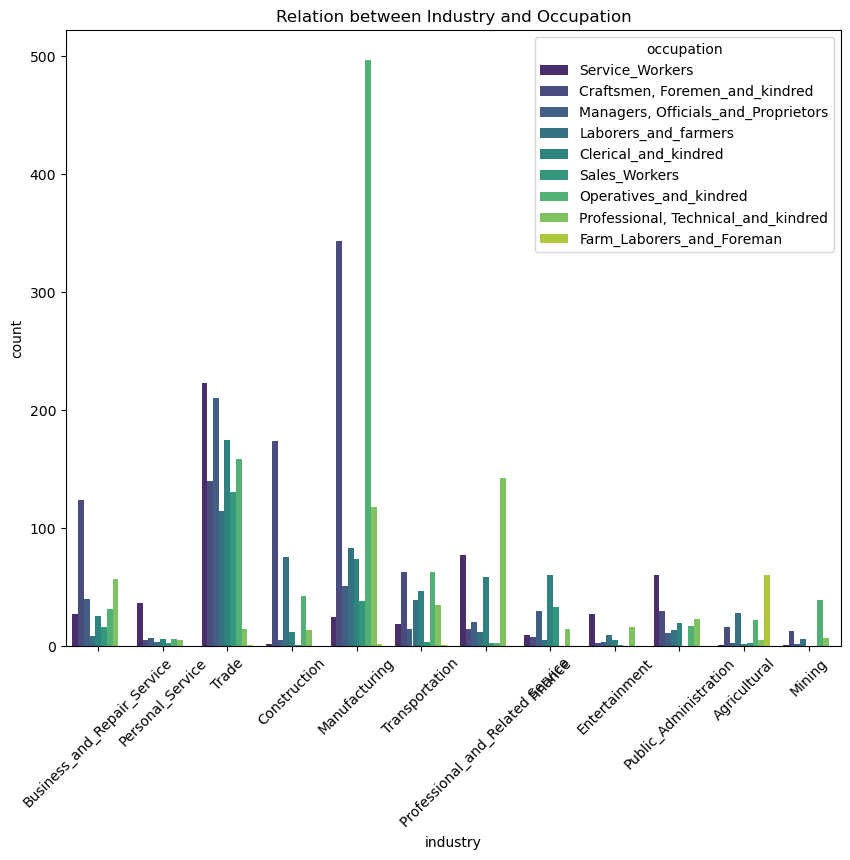

In [329]:
# relation between industry and occupation plot HISTOGRAM
plt.figure(figsize=(10, 8))
sns.countplot(x='industry', hue='occupation', data=df, palette='viridis')
plt.title('Relation between Industry and Occupation')
plt.xticks(rotation=45)




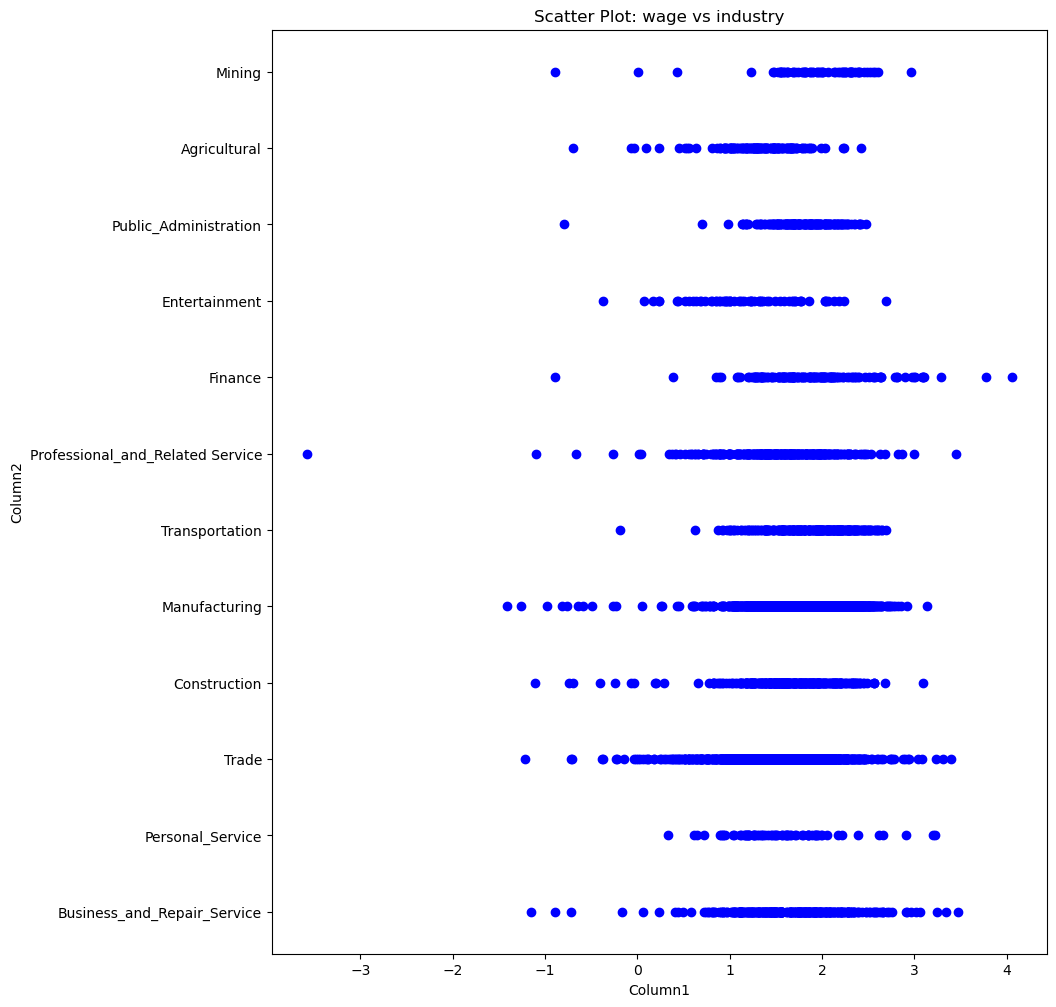

In [330]:
plt.figure(figsize=(10, 12))
plt.scatter(df['wage'], df['industry'], color='blue')
plt.title('Scatter Plot: wage vs industry')
plt.xlabel('Column1')
plt.ylabel('Column2')
plt.show()

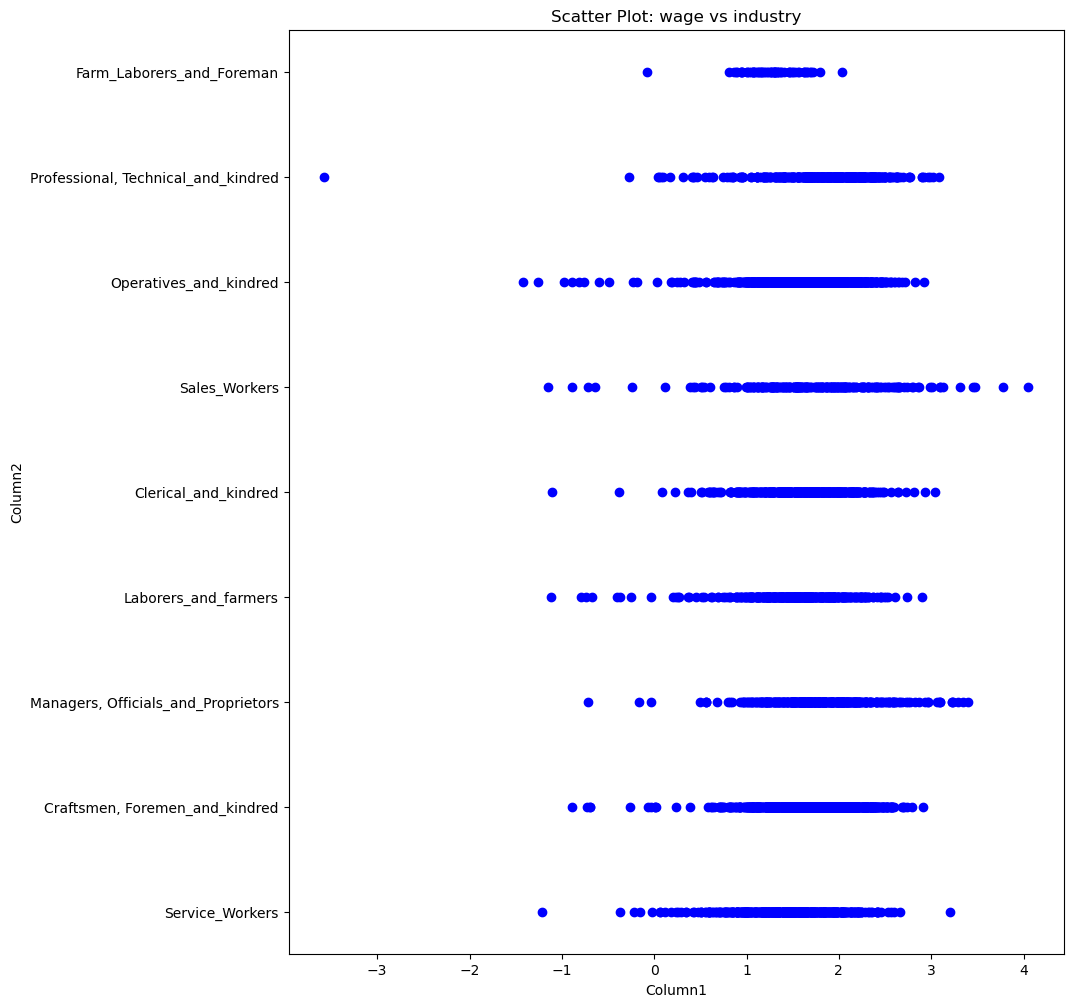

In [331]:
plt.figure(figsize=(10, 12))
plt.scatter(df['wage'], df['occupation'], color='blue')
plt.title('Scatter Plot: wage vs industry')
plt.xlabel('Column1')
plt.ylabel('Column2')
plt.show()

In [332]:

columns_to_encode = ['union', 'ethn', 'maried', 'health', 'industry', 'occupation']

label_encoders = {col: LabelEncoder() for col in columns_to_encode}

for col in columns_to_encode:
    df[col] = label_encoders[col].fit_transform(df[col])




In [333]:
df["residence"] = df["residence"].map({"south": 1, "nothern_central": 2,"north_east": 3, "rural_area": 4})

In [334]:
df.head()


,nr,year,school,exper,union,ethn,maried,health,wage,industry,occupation,residence
0,13,1980,14,1,0,2,0,0,1.197540,1,8,3
1,13,1981,14,2,1,2,0,0,1.853060,7,8,3
2,13,1982,14,3,0,2,0,0,1.344462,1,8,3
3,13,1983,14,4,0,2,0,0,1.433213,1,8,3
4,13,1984,14,5,0,2,0,0,1.568125,7,1,3


In [335]:
df['residence'].value_counts()

residence
1    2578
2     964
3     733
4      85
Name: count, dtype: int64

In [336]:
df.isnull().sum()

nr            0
year          0
school        0
exper         0
union         0
ethn          0
maried        0
health        0
wage          0
industry      0
occupation    0
residence     0
dtype: int64

<Axes: >

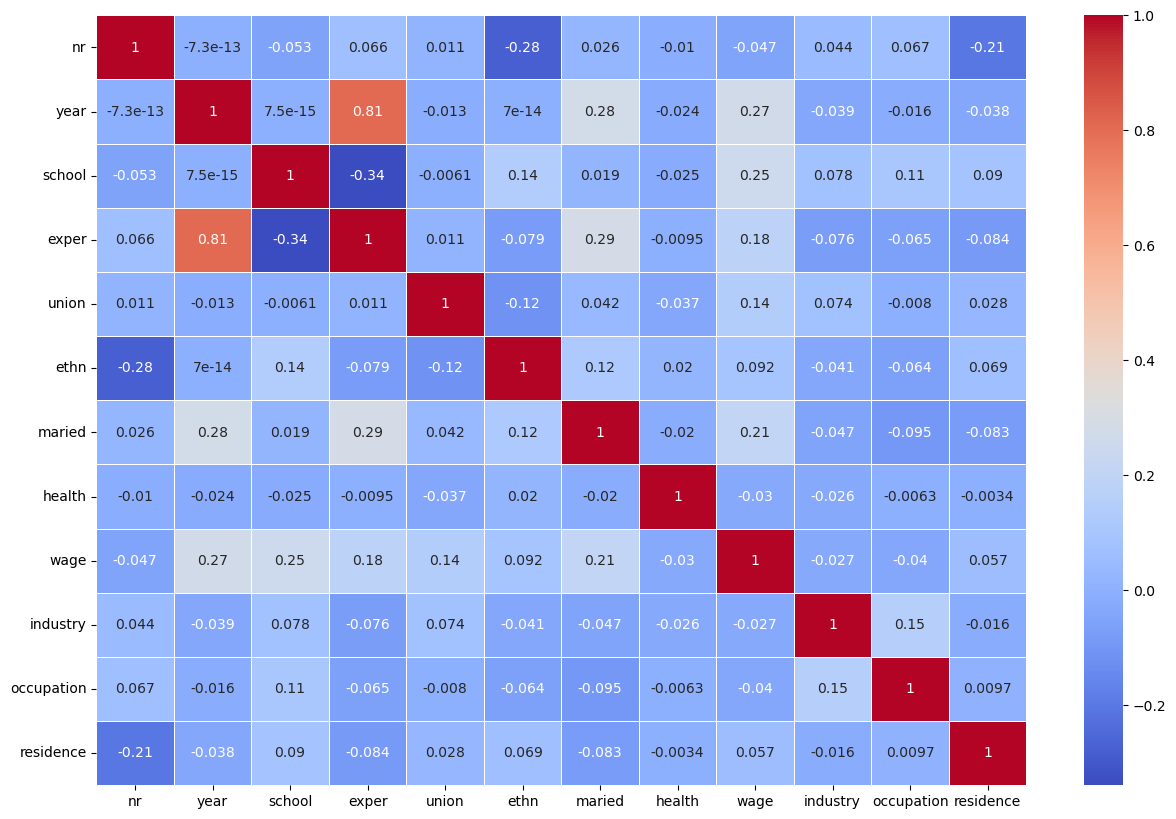

In [337]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, ax=ax)

In [338]:
# check how many vare are negative in df.wage
df[df['wage'] < 0].value_counts().sum()

43

In [339]:
df.shape

(4360, 12)

In [340]:
df1 = df[df['wage'] > 0]

In [341]:
df1.shape

(4317, 12)

In [342]:
df1.wage.describe()

count    4317.000000
mean        1.671902
std         0.480092
min         0.004076
25%         1.363681
50%         1.678757
75%         1.994610
max         4.051860
Name: wage, dtype: float64

In [343]:
df1.corr()

,nr,year,school,exper,union,ethn,maried,health,wage,industry,occupation,residence
nr,1.000000,0.001948,-0.053390,0.066474,0.010209,-0.279271,0.027277,-0.009949,-0.041377,0.048614,0.067471,-0.209157
year,0.001948,1.000000,-0.001240,0.809736,-0.015383,0.000606,0.276843,-0.024964,0.279163,-0.040909,-0.016693,-0.040416
school,-0.053390,-0.001240,1.000000,-0.342298,-0.006440,0.140391,0.018452,-0.025336,0.282033,0.079128,0.108193,0.089063
exper,0.066474,0.809736,-0.342298,1.000000,0.009996,-0.079696,0.285953,-0.010380,0.171293,-0.078172,-0.065310,-0.087086
union,0.010209,-0.015383,-0.006440,0.009996,1.000000,-0.115331,0.041251,-0.037786,0.153856,0.073893,-0.005238,0.030020
ethn,-0.279271,0.000606,0.140391,-0.079696,-0.115331,1.000000,0.117857,0.019786,0.096109,-0.040263,-0.064273,0.068338
maried,0.027277,0.276843,0.018452,0.285953,0.041251,0.117857,1.000000,-0.020323,0.207665,-0.047371,-0.095892,-0.082746
health,-0.009949,-0.024964,-0.025336,-0.010380,-0.037786,0.019786,-0.020323,1.000000,-0.039752,-0.026915,-0.006102,-0.003572
wage,-0.041377,0.279163,0.282033,0.171293,0.153856,0.096109,0.207665,-0.039752,1.000000,-0.043649,-0.036353,0.058470
industry,0.048614,-0.040909,0.079128,-0.078172,0.073893,-0.040263,-0.047371,-0.026915,-0.043649,1.000000,0.151660,-0.014873


<Axes: >

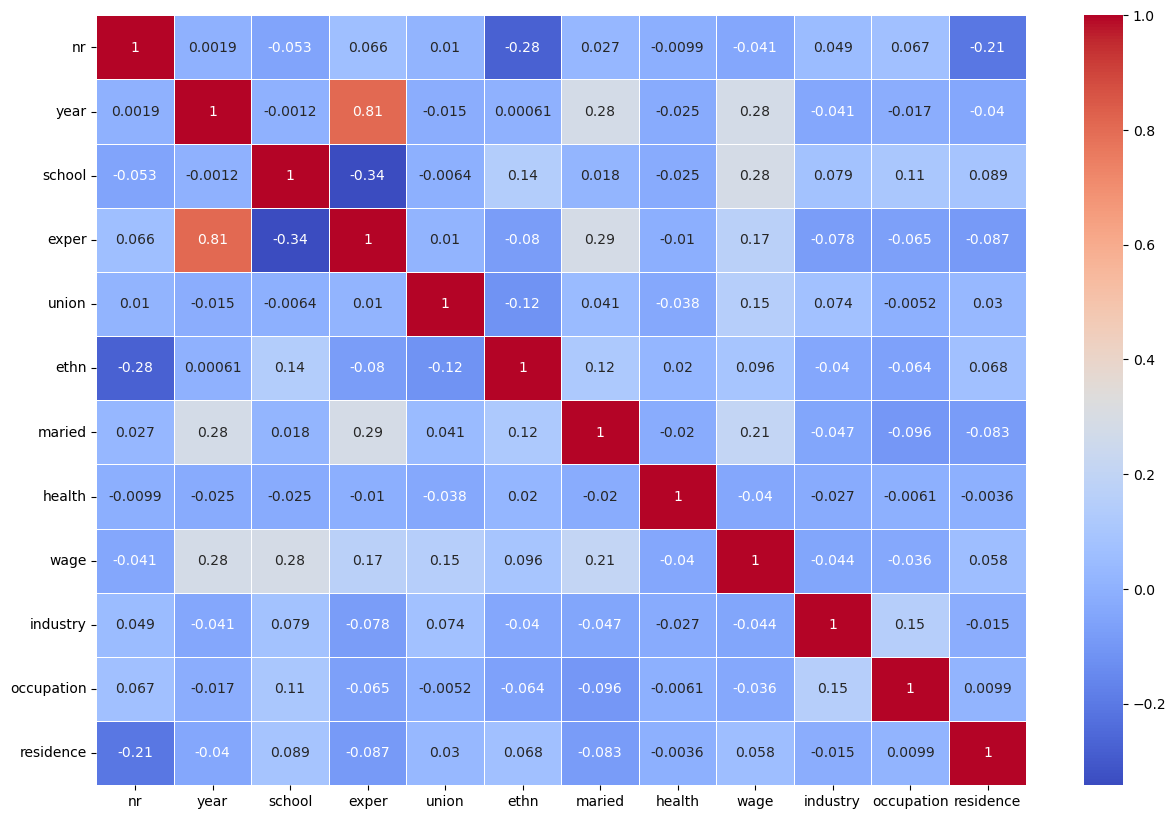

In [344]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', linewidths=0.5, ax=ax)

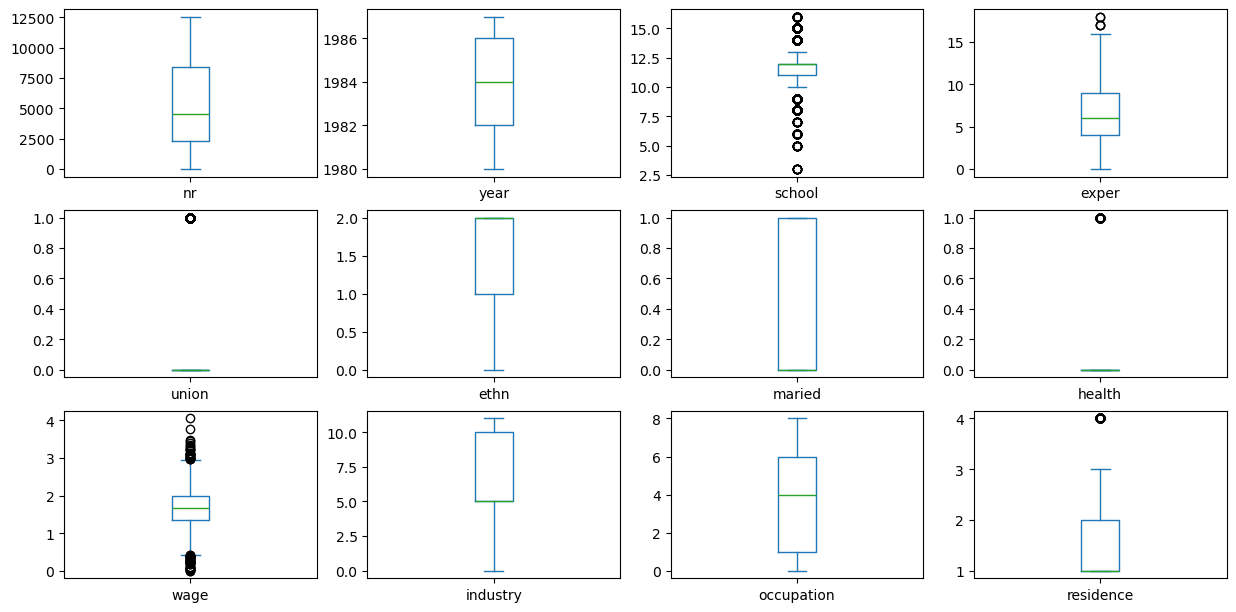

In [345]:
df1.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,10))
plt.show()